In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel

In [2]:
def learning_curve():
    curve_portfolio = []
    curve_market = []
    for i in range(1, 2001):
        
        value = pd.read_hdf(f'regelum_data/outputs/2024-05-28/00-00-01/0/.callbacks/ValueCallback/Total_Objectives_in_iteration_{str(i).zfill(5)}.h5')
        if (i - 1)% 20 < 10:
            curve_portfolio.append(np.mean(value.objective))
        else:
            curve_market.append(np.mean(value.objective))
    return curve_portfolio, curve_market

In [3]:
port, market = learning_curve()

Text(0, 0.5, 'Cost by iteration')

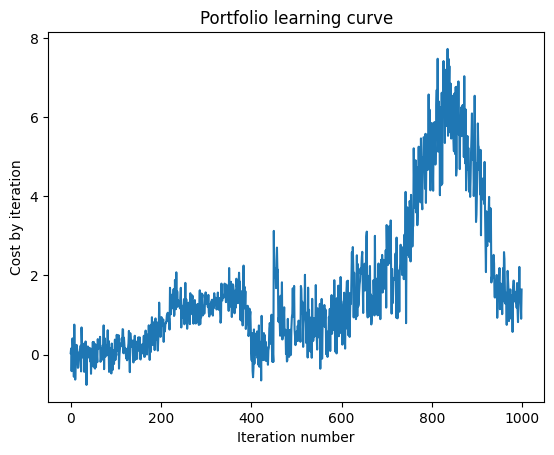

In [4]:
plt.plot(port)
plt.xlabel('Iteration number')
plt.title('Portfolio learning curve')
plt.ylabel('Cost by iteration')

Text(0, 0.5, 'Cost by iteration')

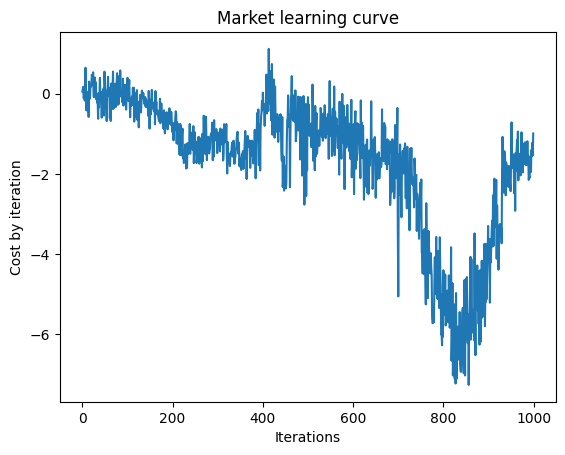

In [5]:
plt.plot(market)
plt.xlabel('Iterations')
plt.title('Market learning curve')
plt.ylabel('Cost by iteration')

Text(0, 0.5, 'Critic value by epoch')

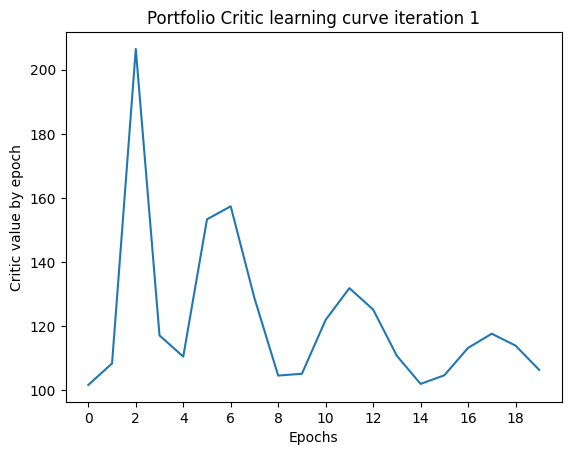

In [6]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00001.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Portfolio Critic learning curve iteration 1')
plt.ylabel('Critic value by epoch')

Text(0, 0.5, 'Critic value by epoch')

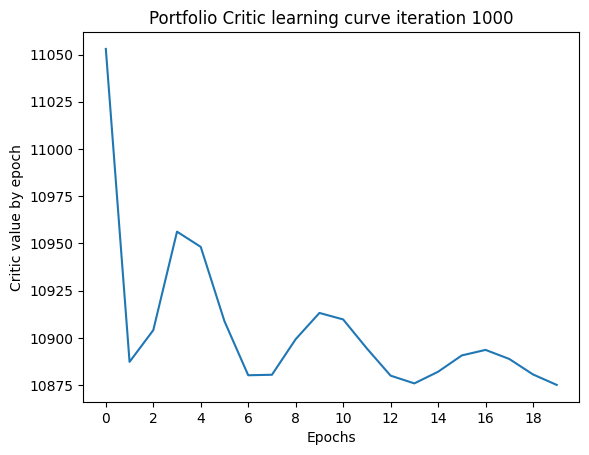

In [7]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 01990.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Portfolio Critic learning curve iteration 1000')
plt.ylabel('Critic value by epoch')

Text(0, 0.5, 'Critic value by epoch')

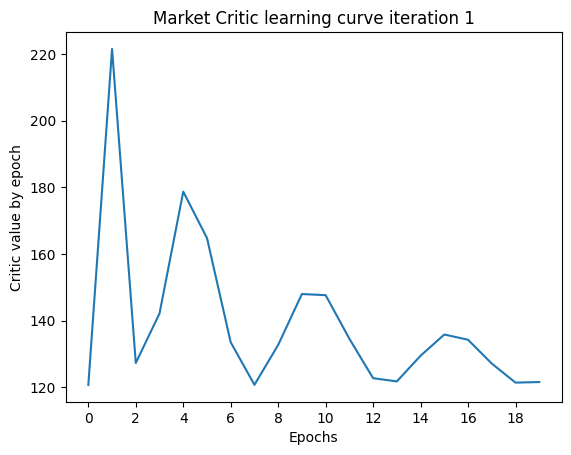

In [8]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00011.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Market Critic learning curve iteration 1')
plt.ylabel('Critic value by epoch')

Text(0, 0.5, 'Critic value by epoch')

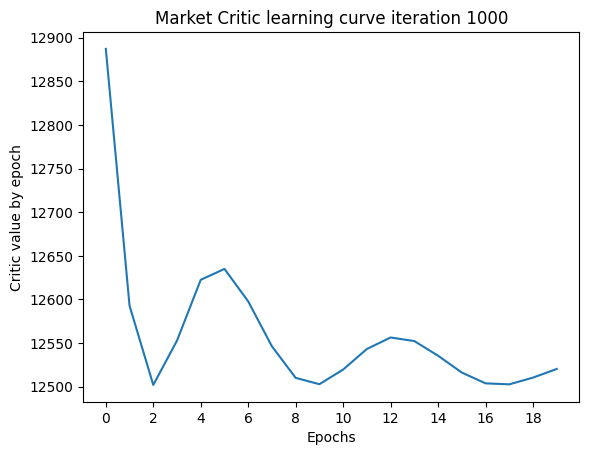

In [9]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 02000.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Market Critic learning curve iteration 1000')
plt.ylabel('Critic value by epoch')

In [10]:
history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-21-49/0/.callbacks/HistoricalDataCallback/observations_actions_it_00050_ep_00002.h5')[1:]
history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-29-43/0/.callbacks/HistoricalDataCallback/observations_actions_it_00050_ep_00004.h5')[1:]

In [11]:
history_sim = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/HistoricalDataCallback/observations_actions_it_01200_ep_00008.h5')[1:]

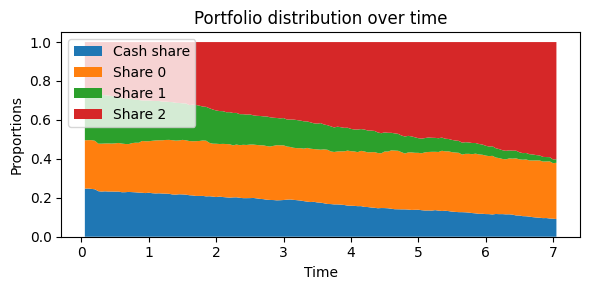

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Transpose the data
data = np.array(history_sim[['cash share', 'share_0', 'share_1', 'share_2']]).T

# Plotting
plt.figure(figsize=(6,3))

# Plot the stacked area plot
plt.stackplot(history_sim.time.to_list(), data, labels=['Cash share', 'Share 0', 'Share 1', 'Share 2'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('Portfolio distribution over time')
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


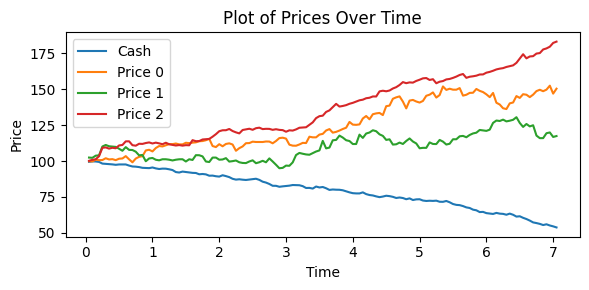

In [13]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(6, 3))

# Plot all prices on the same plot
plt.plot(history_sim['time'], history_sim['cash [USD]'], label='Cash')
plt.plot(history_sim['time'], history_sim['current_price_0 [USD]'],  label='Price 0')
plt.plot(history_sim['time'], history_sim['current_price_1 [USD]'],  label='Price 1')
plt.plot(history_sim['time'], history_sim['current_price_2 [USD]'], label='Price 2')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Plot of Prices Over Time')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


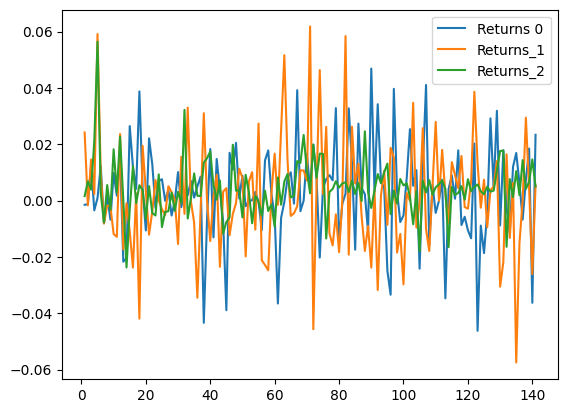

In [14]:
plt.plot(history_sim.returns_0)
plt.plot(history_sim.returns_1)
plt.plot(history_sim.returns_2)
plt.legend(('Returns 0', 'Returns_1', 'Returns_2'))

In [15]:
np.std(history_sim.returns_0)

0.016564732977184058

In [16]:
np.std(history_0.returns_0)

0.004644155223152778

In [17]:
def calculate_sharpe_PnL():

    for j in range(9, 10):
        sharpe_0 = []
        sharpe_1 = []
        sharpe_based = []
        sharpe_random = []
        sharpe_fixed = []
        pnl_0 = []
        pnl_1 = []
        pnl_based = []
        pnl_random= []
        pnl_fixed= []
        # returns_0 = []
        # returns_1 = []
        for i in range(1, 16):

            history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-05-28/00-29-26/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-05-28/00-25-18/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_random = pd.read_hdf(f'./regelum_data/outputs/2024-06-01/19-24-31/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_fixed = pd.read_hdf(f'./regelum_data/outputs/2024-06-01/21-21-35/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_0['PnL'] = (history_0['current_price_0 [USD]']*history_0['current_volume_0'] +
                history_0['current_price_1 [USD]']*history_0['current_volume_1']+
                history_0['current_price_2 [USD]']*history_0['current_volume_2']+
                history_0['cash [USD]'])
            history_1['PnL'] = (history_1['current_price_0 [USD]']*history_1['current_volume_0'] +
                history_1['current_price_1 [USD]']*history_1['current_volume_1']+
                history_1['current_price_2 [USD]']*history_1['current_volume_2']+
                history_1['cash [USD]'])
            history_random['PnL'] = (history_random['current_price_0 [USD]']*history_random['current_volume_0'] +
                history_random['current_price_1 [USD]']*history_random['current_volume_1']+
                history_random['current_price_2 [USD]']*history_random['current_volume_2']+
                history_random['cash [USD]'])
            history_fixed['PnL'] = (history_fixed['current_price_0 [USD]']*history_fixed['current_volume_0'] +
                history_fixed['current_price_1 [USD]']*history_fixed['current_volume_1']+
                history_fixed['current_price_2 [USD]']*history_fixed['current_volume_2']+
                history_fixed['cash [USD]'])
            history_0['sum_of_prices'] = (history_0['current_price_0 [USD]'] +
                history_0['current_price_1 [USD]']+
                history_0['current_price_2 [USD]']+ 100)
            sharpe_based.append(np.mean((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1))/np.std((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1)))
            sharpe_0.append(np.mean((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1))/np.std((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)))
            sharpe_1.append(np.mean((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1))/np.std((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)))
            sharpe_random.append(np.mean((history_random['PnL'] - history_random['PnL'].shift(1))/history_random['PnL'].shift(1))/np.std((history_random['PnL'] - history_random['PnL'].shift(1))/history_random['PnL'].shift(1)))
            sharpe_fixed.append(np.mean((history_fixed['PnL'] - history_fixed['PnL'].shift(1))/history_fixed['PnL'].shift(1))/np.std((history_fixed['PnL'] - history_fixed['PnL'].shift(1))/history_fixed['PnL'].shift(1)))
            pnl_0.append(history_0['PnL'].iloc[-1] - history_0['PnL'].iloc[0])
            pnl_1.append(history_1['PnL'].iloc[-1] - history_1['PnL'].iloc[0])
            pnl_random.append(history_random['PnL'].iloc[-1] - history_random['PnL'].iloc[0])
            pnl_fixed.append(history_fixed['PnL'].iloc[-1] - history_fixed['PnL'].iloc[0])
            pnl_based.append(history_0['sum_of_prices'].iloc[-1] - history_0['sum_of_prices'].iloc[0])
        print(j,np.mean(sharpe_based), np.mean(sharpe_0), np.mean(sharpe_random), np.mean(sharpe_fixed), np.mean(sharpe_1), np.mean(pnl_based), np.mean(pnl_0), np.mean(pnl_random),np.mean(pnl_fixed), np.mean(pnl_1))
        print(j,np.std(sharpe_based), np.std(sharpe_0), np.std(sharpe_random), np.std(sharpe_fixed), np.std(sharpe_1), np.std(pnl_based), np.std(pnl_0), np.std(pnl_random), np.std(pnl_fixed), np.std(pnl_1))
        print(ttest_rel(sharpe_based, sharpe_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(sharpe_0, sharpe_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(sharpe_random, sharpe_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(sharpe_fixed, sharpe_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(pnl_based, pnl_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(pnl_0, pnl_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(pnl_random, pnl_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(pnl_fixed, pnl_1, alternative = 'less', nan_policy = 'omit'))
    return sharpe_based, sharpe_0, sharpe_random, sharpe_fixed, sharpe_1, pnl_based, pnl_0, pnl_random, pnl_fixed, pnl_1

sharpe_based, sharpe_0, sharpe_random, sharpe_fixed, sharpe_1, pnl_based, pnl_0, pnl_random, pnl_fixed, pnl_1 = calculate_sharpe_PnL()

9 -0.019576844229357016 -0.020034230546035214 -0.024298984457820052 -0.009551590211698137 0.04035593647343068 -8.813999999999993 -9.552989636390059 -15.778278612309181 -3.9869561871503834 5.397393831991076
9 0.06930867422279824 0.06859576992794628 0.06601234292652493 0.07250651598446813 0.05929884546740962 28.50972811749235 29.79294957438007 40.375935217686006 19.869652130397647 9.336483564121053
TtestResult(statistic=-2.582816656770377, pvalue=0.010845156919810353, df=14)
TtestResult(statistic=-2.602997439030289, pvalue=0.01042765087551054, df=14)
TtestResult(statistic=-2.6823721691146303, pvalue=0.008931225762953281, df=14)
TtestResult(statistic=-2.1454294864131995, pvalue=0.024970105676559343, df=14)
TtestResult(statistic=-1.9952431919571074, pvalue=0.03292817076253278, df=14)
TtestResult(statistic=-2.0008140687457496, pvalue=0.032595565415706476, df=14)
TtestResult(statistic=-2.0423261197019147, pvalue=0.030212334869353763, df=14)
TtestResult(statistic=-1.8805748910761668, pvalue=0

Text(0, 0.5, 'Mean Sharpe')

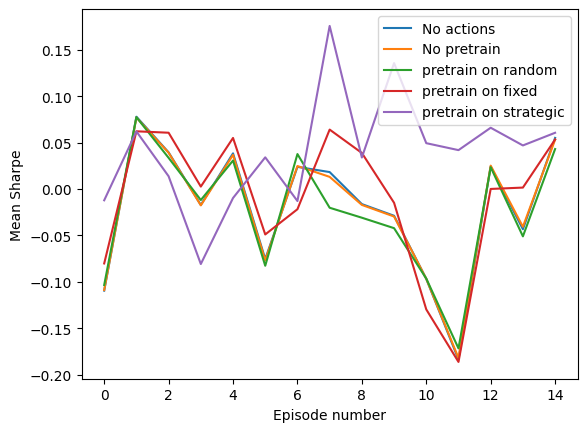

In [18]:
plt.plot(np.array([sharpe_based, sharpe_0, sharpe_random, sharpe_fixed, sharpe_1]).T)
plt.legend(('No actions','No pretrain','pretrain on random', 'pretrain on fixed', 'pretrain on strategic'))
plt.xlabel('Episode number')
plt.ylabel('Mean Sharpe')

Text(0, 0.5, 'Mean PnL')

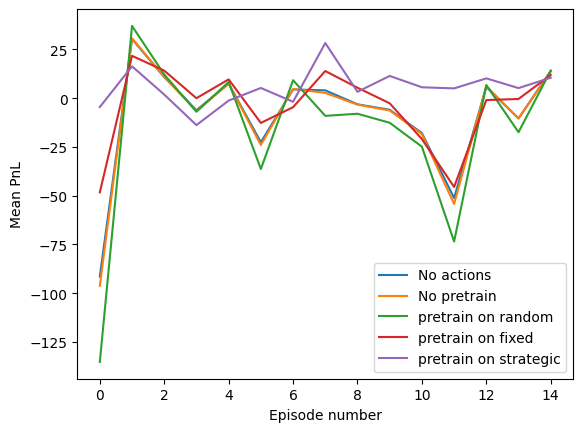

In [19]:
plt.plot(np.array([pnl_based, pnl_0, pnl_random, pnl_fixed, pnl_1]).T)
plt.legend(('No actions','No pretrain','pretrain on random', 'pretrain on fixed', 'pretrain on strategic'))
plt.xlabel('Episode number')
plt.ylabel('Mean PnL')

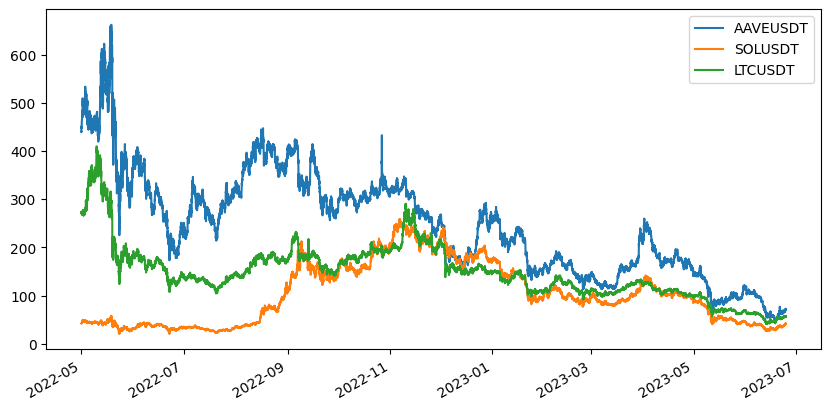

In [20]:
import datetime
plt.figure(figsize=(10, 5))
plt.plot([datetime.datetime(2022, 5, 1, 0) + datetime.timedelta(minutes=30*i) for i in range(20160)], np.load('regelum_data/historical_data.npy')[:20160])
plt.legend(('AAVEUSDT','SOLUSDT','LTCUSDT'))
plt.gcf().autofmt_xdate()